In [1]:
#app reviews sentiment analysis
# app rewiews sentiment analysis means evaluating and understanding the sentiment sexpressed in user rewivews of mobile applications

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\deves\\Desktop\\linkedin-reviews.csv")pl

In [4]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


### Exploratory Data Analysis
 we will start by analyzing the distribution of rattings. it will provide insight into the overall sentiment of the reviews. then we can explore further, such as analyzing the length of reviews,and possily derive insights from the text of the reviwes.

### plotting the distribution of ratings

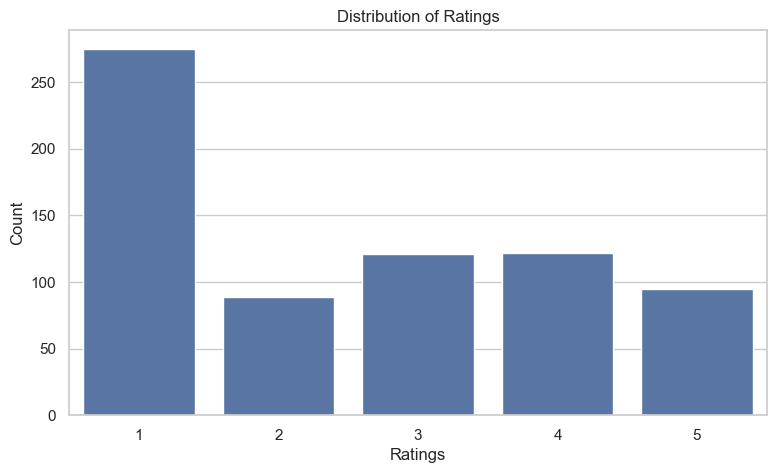

In [13]:
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [14]:
### AddiTng Sentiment Labels in the Data

In [15]:
# we will use Textblob library.Textblob provides a polarity scores raning from -1(very negative) to 1(very positive) for a given text .we can use this score to classify each review's sentiment as positive , negative or neutral.

In [18]:
from textblob import TextBlob

In [21]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return'Neutral'

In [23]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [24]:
df.sample(5)

,Review,Rating,Sentiment
15,"Nothing special comparing to web. Please, enab...",2,Positive
264,No groups? Most of my traffic is on groups.......,1,Positive
448,Very slow to retrieve data after last update e...,2,Negative
186,It's a good start but has a long way to go. Un...,3,Positive
196,Muy grande sería bueno poder moverlo al SDcard...,3,Neutral


### Analyzing App Reviews Sentiment

In [25]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Neutral     300
Positive    295
Negative    107
Name: count, dtype: int64

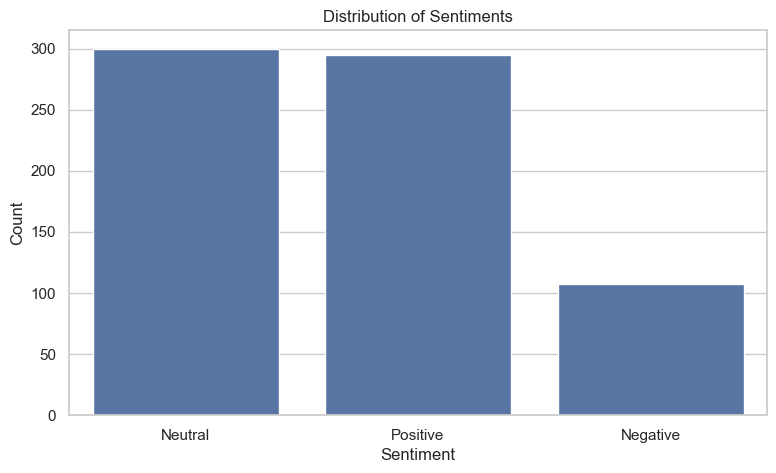

In [27]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
            y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### So, we can see althrough the app has low ratings, still the reviewers don't use many negative words in the reviews for the app
Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is correlation between the sentiment of the text and numerical ratings.

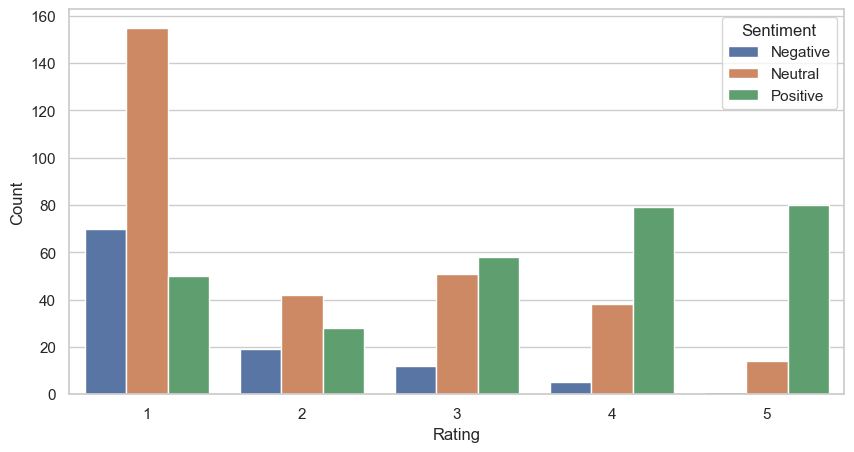

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data = df,
              x= 'Rating',
              hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()